# CSSEGISandData/COVID-19
* Johns Hopkins UniversityのGitHubからCOVID-19の感染者数のデータを取得
* 累積感染者数、新規感染者数、死者数、回復者数、現行感染者数の国別データをExcelファイルで出力
* Update frequency
** Files after Feb 1 (UTC): once a day around 23:59 (UTC).

https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## Confirmed Global（累積感染者数）

In [2]:
confirmed = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [4]:
confirmed.loc[confirmed[confirmed['Province/State'] == 'Hong Kong'].index,'Country/Region'] = 'Hong Kong'

In [5]:
confirmed.loc[confirmed[confirmed['Province/State'] == 'Macau'].index,'Country/Region'] = 'Macau'

In [6]:
confirmed_df = confirmed.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [7]:
confirmed_df.columns = pd.to_datetime(confirmed_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [8]:
confirmed_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
Albania,0,0,0,0,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
Algeria,0,0,0,0,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
Andorra,0,0,0,0,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
Angola,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [9]:
# confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
#     'data/confirmed_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

In [10]:
confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).to_csv(
    'data/confirmed_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Cases Global（新規感染者数）

In [11]:
new_cases = confirmed_df.diff(axis=1)

In [12]:
new_cases.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,10.0,10.0,16.0,0.0,10.0,50.0,4.0,63.0,36.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,23.0,28.0,12.0,11.0,15.0,11.0,20.0,16.0,18.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,38.0,65.0,42.0,45.0,57.0,73.0,132.0,131.0,139.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,24.0,36.0,43.0,41.0,26.0,36.0,6.0,14.0,38.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0


In [13]:
# new_cases.sort_values(new_cases.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
#     'data/new_cases_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

In [14]:
new_cases.sort_values(new_cases.columns[-1],ascending=False).to_csv(
    'data/new_cases_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Deaths Global（累積死者数）

In [15]:
deaths = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [16]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [17]:
deaths.loc[deaths[deaths['Province/State'] == 'Hong Kong'].index,'Country/Region'] = 'Hong Kong'

In [18]:
deaths.loc[deaths[deaths['Province/State'] == 'Macau'].index,'Country/Region'] = 'Macau'

In [19]:
deaths_df = deaths.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [20]:
deaths_df.columns = pd.to_datetime(deaths_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [21]:
deaths_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
Albania,0,0,0,0,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
Algeria,0,0,0,0,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [22]:
# deaths_df.sort_values(deaths_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
#     'data/deaths_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

In [23]:
deaths_df.sort_values(deaths_df.columns[-1],ascending=False).to_csv(
    'data/deaths_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Deaths Global（新規死者数）

In [24]:
new_deaths = deaths_df.diff(axis=1)

In [25]:
new_deaths.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,2.0,0.0,1.0,4.0,0.0,1.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,4.0,1.0,3.0,2.0,4.0,9.0,14.0,28.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.0,2.0,4.0,2.0,1.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [26]:
new_deaths.sort_values(new_deaths.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/new_deaths_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Recovered Global（回復者数）

In [27]:
recovered = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [28]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,2,2,2,2,2,2,5,5,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,17,17,31,31,33,44,52,67,76
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,24,65,29,29,31,31,37,46,61,61
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,10,10,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [29]:
recovered.loc[recovered[recovered['Province/State'] == 'Hong Kong'].index,'Country/Region'] = 'Hong Kong'

In [30]:
recovered.loc[recovered[recovered['Province/State'] == 'Macau'].index,'Country/Region'] = 'Macau'

In [31]:
recovered_df = recovered.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [32]:
recovered_df.columns = pd.to_datetime(recovered_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [33]:
recovered_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,5,5,10
Albania,0,0,0,0,0,0,0,0,0,0,...,10,17,17,31,31,33,44,52,67,76
Algeria,0,0,0,0,0,0,0,0,0,0,...,24,65,29,29,31,31,37,46,61,61
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,10,10,10,10
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [34]:
# recovered_df.sort_values(recovered_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
#     'data/recovered_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

In [35]:
recovered_df.sort_values(recovered_df.columns[-1],ascending=False).to_csv(
    'data/recovered_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Recovered Global（新規回復者数）

In [36]:
new_recovered = recovered_df.diff(axis=1)

In [37]:
new_recovered.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,7.0,0.0,14.0,0.0,2.0,11.0,8.0,15.0,9.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-41.0,41.0,-36.0,0.0,2.0,0.0,6.0,9.0,15.0,0.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
new_recovered.sort_values(new_recovered.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/new_recovered_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Compare DataFrame Shapes

In [39]:
confirmed_df.shape

(183, 72)

In [40]:
deaths_df.shape

(183, 72)

In [41]:
recovered_df.shape

(183, 72)

In [42]:
confirmed_df[~confirmed_df.index.isin(deaths_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,


In [43]:
confirmed_df[~confirmed_df.index.isin(recovered_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,


In [44]:
deaths_df[~deaths_df.index.isin(recovered_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,


## New Country Check

In [45]:
countries = pd.read_csv('countries.csv')

In [46]:
countries.head()

,Country,Japanese,Code,Region
0,Afghanistan,アフガニスタン,AF,Asia
1,Albania,アルバニア,AL,Europe
2,Algeria,アルジェリア,DZ,Africa
3,Andorra,アンドラ,AD,Europe
4,Angola,アンゴラ,AO,Africa


In [47]:
confirmed_df[~confirmed_df.index.isin(countries.Country)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,


## Active Global（現行感染者数）

In [48]:
active_df = confirmed_df - deaths_df - recovered_df

In [49]:
active_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,72,80,88,104,104,114,164,165,228,257
Albania,0,0,0,0,0,0,0,0,0,0,...,108,124,151,147,156,169,168,176,177,185
Algeria,0,0,0,0,0,0,0,0,0,0,...,221,216,313,354,394,449,512,626,728,839
Andorra,0,0,0,0,0,0,0,0,0,0,...,162,186,220,263,304,327,352,354,366,403
Angola,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,5,5,5,4,5,5


In [50]:
# active_df.sort_values(active_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
#     'data/active_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

In [51]:
active_df.sort_values(active_df.columns[-1],ascending=False).to_csv(
    'data/active_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Active Global Change（現行感染者増減数）

In [52]:
active_change = active_df.diff(axis=1)

In [53]:
active_change.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,8.0,8.0,16.0,0.0,10.0,50.0,1.0,63.0,29.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,16.0,27.0,-4.0,9.0,13.0,-1.0,8.0,1.0,8.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,-5.0,97.0,41.0,40.0,55.0,63.0,114.0,102.0,111.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,24.0,34.0,43.0,41.0,23.0,25.0,2.0,12.0,37.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0


In [54]:
# active_change.sort_values(active_change.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
#     'data/active_change_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

In [55]:
active_change.sort_values(active_change.columns[-1],ascending=False).to_csv(
    'data/active_change_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Visualization

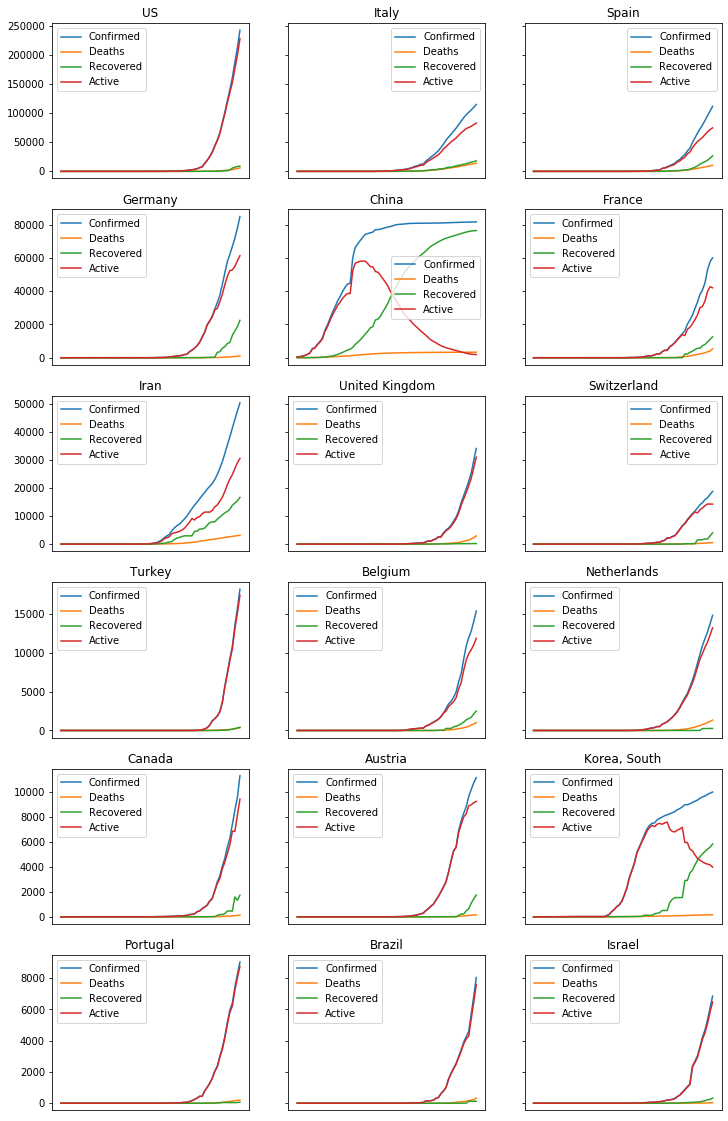

In [56]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(12,20),sharey='row')

for country, ax in zip(confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).index[:18], axes.flatten()):
    summary = pd.concat([confirmed_df[confirmed_df.index == country],
                         deaths_df[deaths_df.index == country],
                         recovered_df[recovered_df.index == country],
                         active_df[active_df.index == country]])
    summary.index = ['Confirmed','Deaths','Recovered','Active']
    ax.plot(summary.T)
    ax.set_title(country)
    ax.legend(summary.T.columns)
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page1.pdf')

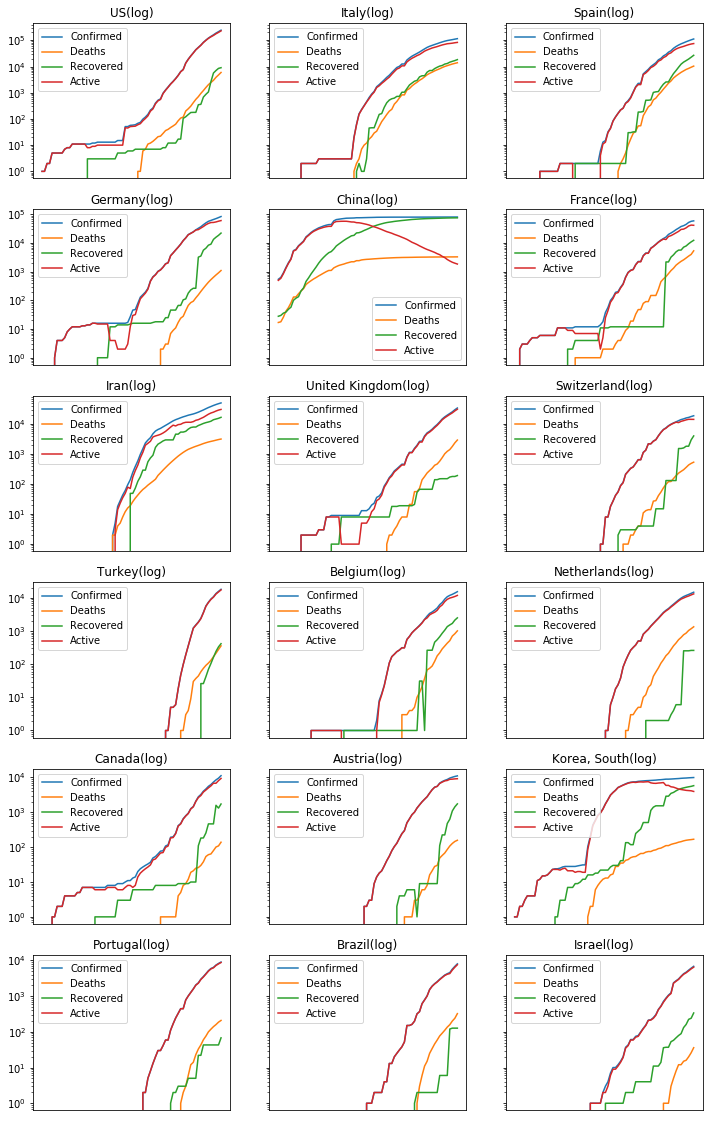

In [57]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(12,20),sharey='row')

for country, ax in zip(confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).index[:18], axes.flatten()):
    summary = pd.concat([confirmed_df[confirmed_df.index == country],
                         deaths_df[deaths_df.index == country],
                         recovered_df[recovered_df.index == country],
                         active_df[active_df.index == country]])
    summary.index = ['Confirmed','Deaths','Recovered','Active']
    ax.plot(summary.T)
    ax.set_title(country+'(log)')
    ax.legend(summary.T.columns)
    ax.set_yscale('log')
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page2.pdf')

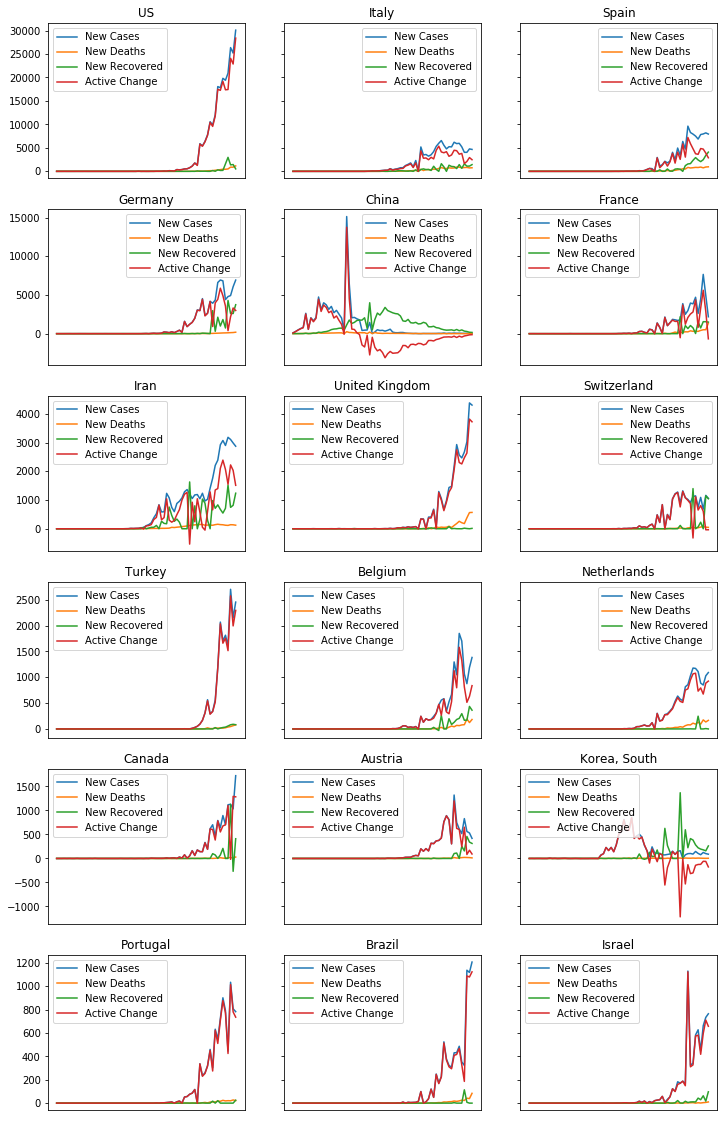

In [58]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(12,20),sharey='row')

for country, ax in zip(confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).index[:18], axes.flatten()):
    summary = pd.concat([new_cases[new_cases.index == country],
                         new_deaths[new_deaths.index == country],
                         new_recovered[new_recovered.index == country],
                         active_change[active_change.index == country]])
    summary.index = ['New Cases','New Deaths','New Recovered','Active Change']
    ax.plot(summary.T)
    ax.set_title(country)
    ax.legend(summary.T.columns)
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page3.pdf')

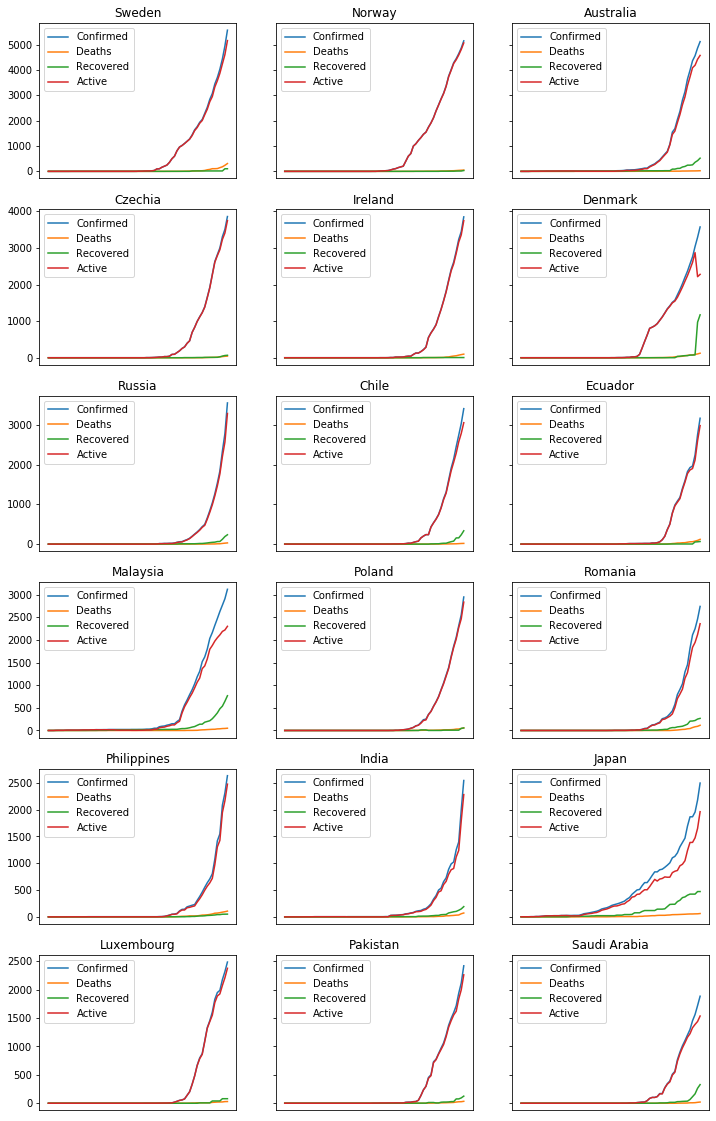

In [59]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(12,20),sharey='row')

for country, ax in zip(confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).index[18:36], axes.flatten()):
    summary = pd.concat([confirmed_df[confirmed_df.index == country],
                         deaths_df[deaths_df.index == country],
                         recovered_df[recovered_df.index == country],
                         active_df[active_df.index == country]])
    summary.index = ['Confirmed','Deaths','Recovered','Active']
    ax.plot(summary.T)
    ax.set_title(country)
    ax.legend(summary.T.columns)
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page4.pdf')

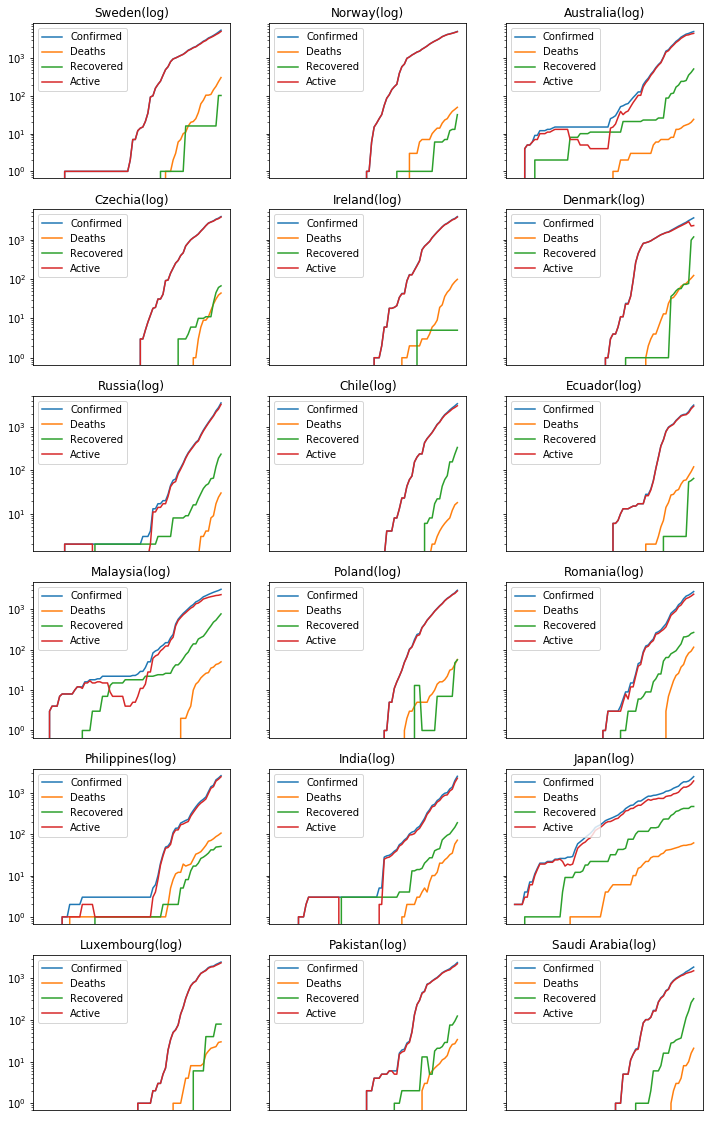

In [60]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(12,20),sharey='row')

for country, ax in zip(confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).index[18:36], axes.flatten()):
    summary = pd.concat([confirmed_df[confirmed_df.index == country],
                         deaths_df[deaths_df.index == country],
                         recovered_df[recovered_df.index == country],
                         active_df[active_df.index == country]])
    summary.index = ['Confirmed','Deaths','Recovered','Active']
    ax.plot(summary.T)
    ax.set_title(country+'(log)')
    ax.legend(summary.T.columns)
    ax.set_yscale('log')
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page5.pdf')

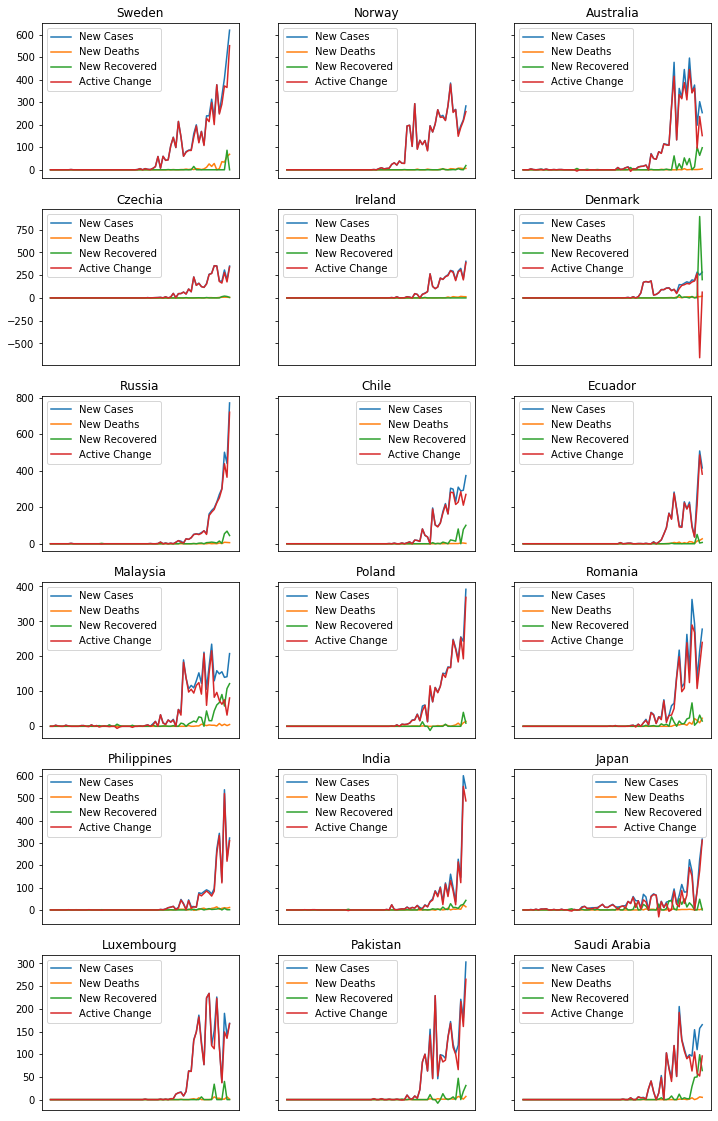

In [61]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(12,20),sharey='row')

for country, ax in zip(confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).index[18:36], axes.flatten()):
    summary = pd.concat([new_cases[new_cases.index == country],
                         new_deaths[new_deaths.index == country],
                         new_recovered[new_recovered.index == country],
                         active_change[active_change.index == country]])
    summary.index = ['New Cases','New Deaths','New Recovered','Active Change']
    ax.plot(summary.T)
    ax.set_title(country)
    ax.legend(summary.T.columns)
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page6.pdf')

## Summary

In [62]:
summary_df = pd.concat([confirmed_df.sum(),deaths_df.sum(),recovered_df.sum(),active_df.sum(),new_cases.sum().astype(int),
                      new_deaths.sum().astype(int),new_recovered.sum().astype(int),active_change.sum().astype(int)],axis=1)

In [63]:
summary_df.columns = ['confirmed','deaths','recovered','active','new cases','new deaths','new recovered','active change']

In [64]:
summary_df.sort_index(ascending=False).head()

,confirmed,deaths,recovered,active,new cases,new deaths,new recovered,active change
2020-04-02,1013157,52983,210263,749911,80552,6174,17086,57292
2020-04-01,932605,46809,193177,692619,75118,4702,15143,55273
2020-03-31,857487,42107,178034,637346,75122,4525,13468,57129
2020-03-30,782365,37582,164566,580217,62248,3657,15484,43107
2020-03-29,720117,33925,149082,537110,59411,3273,9667,46471


In [65]:
summary_df.sort_index(ascending=False).to_csv(
    'data/summary_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

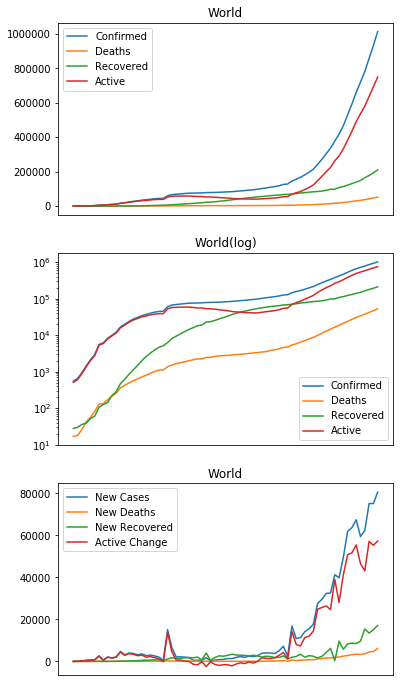

In [66]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,12))
ax1.plot(summary_df[['confirmed','deaths','recovered','active']])
ax1.set_title('World')
ax1.legend(['Confirmed','Deaths','Recovered','Active'])
ax1.set_xticks([])
ax2.plot(summary_df[['confirmed','deaths','recovered','active']])
ax2.set_title('World(log)')
ax2.legend(['Confirmed','Deaths','Recovered','Active'])
ax2.set_yscale('log')
ax2.set_xticks([])
ax3.plot(summary_df[['new cases','new deaths','new recovered','active change']])
ax3.set_title('World')
ax3.legend(['New Cases','New Deaths','New Recovered','Active Change'])
ax3.set_xticks([])

plt.savefig('pdf/page0.pdf')

In [67]:
latest = pd.concat([confirmed_df[[confirmed_df.columns[-1]]],
                    new_cases[[new_cases.columns[-1]]].astype(int),
                    deaths_df[[deaths_df.columns[-1]]],
                    new_deaths[[new_deaths.columns[-1]]].astype(int),
                    recovered_df[[recovered_df.columns[-1]]],
                    new_recovered[[new_recovered.columns[-1]]].astype(int),
                    active_df[[active_df.columns[-1]]],
                    active_change[[active_change.columns[-1]]].astype(int)],axis=1)

In [68]:
latest.columns = ['confirmed','new cases','deaths','new deaths','recovered','new recovered','active','active change']

In [69]:
latest.sort_values('confirmed',ascending=False).head()

,confirmed,new cases,deaths,new deaths,recovered,new recovered,active,active change
Country/Region,,,,,,,,
US,243453,30081,5926,1169,9001,527,228526,28385
Italy,115242,4668,13915,760,18278,1431,83049,2477
Spain,112065,7947,10348,961,26743,4096,74974,2890
Germany,84794,6922,1107,187,22440,3740,61247,2995
China,81589,34,3318,6,76408,160,1863,-132


In [70]:
import pdfkit

In [71]:
f = open('latest.html','w')
a = latest.sort_values('confirmed',ascending=False).head(50).to_html()
f.write(a)
f.close()

In [72]:
pdfkit.from_file('latest.html', 'latest.pdf')

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

## Excel Output

* 国名、項目名を日本語に変換

In [73]:
codes = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')

In [74]:
codes.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola


In [75]:
countries.head()

,Country,Japanese,Code,Region
0,Afghanistan,アフガニスタン,AF,Asia
1,Albania,アルバニア,AL,Europe
2,Algeria,アルジェリア,DZ,Africa
3,Andorra,アンドラ,AD,Europe
4,Angola,アンゴラ,AO,Africa


In [76]:
confirmed_df.index = confirmed_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [77]:
new_cases.index = new_cases.index.map(countries.set_index('Country').Japanese.to_dict())

In [78]:
deaths_df.index = deaths_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [79]:
new_deaths.index = new_deaths.index.map(countries.set_index('Country').Japanese.to_dict())

In [80]:
recovered_df.index = recovered_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [81]:
new_recovered.index = new_recovered.index.map(countries.set_index('Country').Japanese.to_dict())

In [82]:
active_df.index = active_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [83]:
active_change.index = active_change.index.map(countries.set_index('Country').Japanese.to_dict())

In [84]:
summary_df.columns = ['累積感染者数','累積死者数','累積回復者数','現行感染者数','新規感染者数','新規死者数','新規回復者数','現行感染者増減数']

In [85]:
# with pd.ExcelWriter('covid19_'+datetime.today().strftime('%Y%m%d')+'.xlsx') as writer:
#     summary_df.sort_index(ascending=False).to_excel(writer,sheet_name='一覧')
#     confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer, sheet_name='累積感染者数')
#     deaths_df.sort_values(deaths_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='累積死者数')
#     recovered_df.sort_values(recovered_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='累積回復者数')
#     active_df.sort_values(active_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='現行感染者数')
#     new_cases.sort_values(new_cases.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='新規感染者数')
#     new_deaths.sort_values(new_deaths.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='新規死者数')
#     new_recovered.sort_values(new_recovered.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='新規回復者数')
#     active_change.sort_values(active_change.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
#         writer,sheet_name='現行感染者増減数')

In [86]:
with pd.ExcelWriter('covid19_'+datetime.today().strftime('%Y%m%d')+'.xlsx') as writer:
    summary_df.to_excel(writer,sheet_name='一覧')
    confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).to_excel(
        writer, sheet_name='累積感染者数')
    deaths_df.sort_values(deaths_df.columns[-1],ascending=False).to_excel(
        writer,sheet_name='累積死者数')
    recovered_df.sort_values(recovered_df.columns[-1],ascending=False).to_excel(
        writer,sheet_name='累積回復者数')
    active_df.sort_values(active_df.columns[-1],ascending=False).to_excel(
        writer,sheet_name='現行感染者数')
    new_cases.sort_values(new_cases.columns[-1],ascending=False).to_excel(
        writer,sheet_name='新規感染者数')
    new_deaths.sort_values(new_deaths.columns[-1],ascending=False).to_excel(
        writer,sheet_name='新規死者数')
    new_recovered.sort_values(new_recovered.columns[-1],ascending=False).to_excel(
        writer,sheet_name='新規回復者数')
    active_change.sort_values(active_change.columns[-1],ascending=False).to_excel(
        writer,sheet_name='現行感染者増減数')

## Country Summary

In [87]:
latest = pd.concat([confirmed_df[[confirmed_df.columns[-1]]],
                    new_cases[[new_cases.columns[-1]]].astype(int),
                    deaths_df[[deaths_df.columns[-1]]],
                    new_deaths[[new_deaths.columns[-1]]].astype(int),
                    recovered_df[[recovered_df.columns[-1]]],
                    new_recovered[[new_recovered.columns[-1]]].astype(int),
                    active_df[[active_df.columns[-1]]],
                    active_change[[active_change.columns[-1]]].astype(int)],axis=1)

In [88]:
latest.columns = ['累積感染者数','新規感染者数','累積死者数','新規死者数','累積回復者数','新規回復者数','現行感染者数','現行感染者増減数']

In [89]:
latest.sort_values('累積感染者数',ascending=False).head()

,累積感染者数,新規感染者数,累積死者数,新規死者数,累積回復者数,新規回復者数,現行感染者数,現行感染者増減数
Country/Region,,,,,,,,
米国,243453,30081,5926,1169,9001,527,228526,28385
イタリア,115242,4668,13915,760,18278,1431,83049,2477
スペイン,112065,7947,10348,961,26743,4096,74974,2890
ドイツ,84794,6922,1107,187,22440,3740,61247,2995
中国,81589,34,3318,6,76408,160,1863,-132


## Regional Summary

In [90]:
confirmed_df.index = confirmed_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [91]:
confirmed_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,2250,2773,3326,3885,4225,4786,5196,5781,6380,7032
Asia,554,653,937,1429,2105,2912,5558,6139,8204,9885,...,123340,126652,130228,134420,139047,143475,147867,152739,157766,162924
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,712,712,712,712,714,714,714,714,721,721
Europe,0,0,2,3,3,4,8,10,10,18,...,219141,248874,283911,319556,356186,385644,416631,451870,488474,524116
Latin America,0,0,0,0,0,0,0,0,0,0,...,7172,8273,9758,11317,13113,14640,15999,18758,21524,24345
Middle East,0,0,0,0,0,0,0,4,4,4,...,6696,8765,10679,13545,16270,19188,21797,25714,29232,33361
Northern America,1,1,2,2,6,6,7,7,7,11,...,56530,69029,87878,106339,127054,147166,169205,196699,222932,254737
Oceania,0,0,0,0,4,5,5,6,9,9,...,2204,2575,3099,3517,4097,4504,4956,5212,5576,5921


In [92]:
new_cases.index = new_cases.index.map(countries.set_index('Japanese').Region.to_dict())

In [93]:
new_cases.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,432,523,553,559,340,561,410,585,599,652
Asia,0,99,284,492,676,807,2646,581,2065,1681,...,2723,3312,3576,4192,4627,4428,4392,4872,5027,5158
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,7,0
Europe,0,0,2,1,0,1,4,2,0,8,...,23677,29733,35037,35645,36630,29458,30987,35239,36604,35642
Latin America,0,0,0,0,0,0,0,0,0,0,...,968,1101,1485,1559,1796,1527,1359,2759,2766,2821
Middle East,0,0,0,0,0,0,0,4,0,0,...,999,2069,1914,2866,2725,2918,2609,3917,3518,4129
Northern America,0,0,1,0,4,0,1,0,0,4,...,10595,12499,18849,18461,20715,20112,22039,27494,26233,31805
Oceania,0,0,0,0,4,1,0,1,3,0,...,416,371,524,418,580,407,452,256,364,345


In [94]:
deaths_df.index = deaths_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [95]:
deaths_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,64,73,91,115,134,152,173,200,234,287
Asia,17,18,26,42,56,82,131,133,171,213,...,5514,5684,5896,6080,6269,6437,6599,6788,6997,7193
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,13,13
Europe,0,0,0,0,0,0,0,0,0,0,...,12094,14178,16396,18958,21668,24205,27040,30266,33657,38111
Latin America,0,0,0,0,0,0,0,0,0,0,...,115,144,175,215,277,342,403,507,595,760
Middle East,0,0,0,0,0,0,0,0,0,0,...,88,112,142,172,193,231,281,343,426,529
Northern America,0,0,0,0,0,0,0,0,0,0,...,732,972,1247,1635,2087,2531,3058,3974,4866,6065
Oceania,0,0,0,0,0,0,0,0,0,0,...,8,8,13,13,14,17,18,19,21,25


In [96]:
new_deaths.index = new_deaths.index.map(countries.set_index('Japanese').Region.to_dict())

In [97]:
new_deaths.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,7,9,18,24,19,18,21,27,34,53
Asia,0,1,8,16,14,26,49,2,38,42,...,154,170,212,184,189,168,162,189,209,196
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,3,0
Europe,0,0,0,0,0,0,0,0,0,0,...,1759,2084,2218,2562,2710,2537,2835,3226,3391,4454
Latin America,0,0,0,0,0,0,0,0,0,0,...,30,29,31,40,62,65,61,104,88,165
Middle East,0,0,0,0,0,0,0,0,0,0,...,17,24,30,30,21,38,50,62,83,103
Northern America,0,0,0,0,0,0,0,0,0,0,...,150,240,275,388,452,444,527,916,892,1199
Oceania,0,0,0,0,0,0,0,0,0,0,...,1,0,5,0,1,3,1,1,2,4


In [98]:
recovered_df.index = recovered_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [99]:
recovered_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,137,211,184,229,253,283,328,410,505,573
Asia,28,30,36,39,52,61,107,126,141,220,...,86550,88067,89840,91574,92962,94536,96953,98404,99994,101933
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,325,587,597,597,597,603,603,603,603,619
Europe,0,0,0,0,0,0,0,0,0,0,...,19756,23493,29623,36138,42612,48911,58307,66891,78689,92014
Latin America,0,0,0,0,0,0,0,0,0,0,...,110,121,150,207,243,260,686,1166,1275,1584
Middle East,0,0,0,0,0,0,0,0,0,0,...,537,623,692,814,916,1058,1259,1512,1808,2192
Northern America,0,0,0,0,0,0,0,0,0,0,...,458,544,865,1125,1538,3131,6110,8616,9798,10736
Oceania,0,0,0,0,0,0,0,0,2,2,...,127,141,199,231,294,300,320,432,505,612


In [100]:
new_recovered.index = new_recovered.index.map(countries.set_index('Japanese').Region.to_dict())

In [101]:
new_recovered.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,-6,74,-27,45,24,30,45,82,95,68
Asia,0,2,6,3,13,9,46,19,15,79,...,2200,1517,1773,1734,1388,1574,2417,1451,1590,1939
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,0,262,10,0,0,6,0,0,0,16
Europe,0,0,0,0,0,0,0,0,0,0,...,6961,3737,6130,6515,6474,6299,9396,8584,11798,13325
Latin America,0,0,0,0,0,0,0,0,0,0,...,66,11,29,57,36,17,426,480,109,309
Middle East,0,0,0,0,0,0,0,0,0,0,...,119,86,69,122,102,142,201,253,296,384
Northern America,0,0,0,0,0,0,0,0,0,0,...,270,86,321,260,413,1593,2979,2506,1182,938
Oceania,0,0,0,0,0,0,0,0,2,0,...,39,14,58,32,63,6,20,112,73,107


In [102]:
active_df.index = active_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [103]:
active_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,2049,2489,3051,3541,3838,4351,4695,5171,5641,6172
Asia,509,605,875,1348,1997,2769,5320,5880,7892,9452,...,31276,32901,34492,36766,39816,42502,44315,47547,50775,53798
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,377,115,105,105,107,101,101,101,105,89
Europe,0,0,2,3,3,4,8,10,10,18,...,187291,211203,237892,264460,291906,312528,331284,354713,376128,393991
Latin America,0,0,0,0,0,0,0,0,0,0,...,6947,8008,9433,10895,12593,14038,14910,17085,19654,22001
Middle East,0,0,0,0,0,0,0,4,4,4,...,6071,8030,9845,12559,15161,17899,20257,23859,26998,30640
Northern America,1,1,2,2,6,6,7,7,7,11,...,55340,67513,85766,103579,123429,141504,160037,184109,208268,237936
Oceania,0,0,0,0,4,5,5,6,7,7,...,2069,2426,2887,3273,3789,4187,4618,4761,5050,5284


In [104]:
active_change.index = active_change.index.map(countries.set_index('Japanese').Region.to_dict())

In [105]:
active_change.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,431,440,562,490,297,513,344,476,470,531
Asia,0,96,270,473,649,772,2551,560,2012,1560,...,369,1625,1591,2274,3050,2686,1813,3232,3228,3023
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,-2,-262,-10,0,2,-6,0,0,4,-16
Europe,0,0,2,1,0,1,4,2,0,8,...,14957,23912,26689,26568,27446,20622,18756,23429,21415,17863
Latin America,0,0,0,0,0,0,0,0,0,0,...,872,1061,1425,1462,1698,1445,872,2175,2569,2347
Middle East,0,0,0,0,0,0,0,4,0,0,...,863,1959,1815,2714,2602,2738,2358,3602,3139,3642
Northern America,0,0,1,0,4,0,1,0,0,4,...,10175,12173,18253,17813,19850,18075,18533,24072,24159,29668
Oceania,0,0,0,0,4,1,0,1,1,0,...,376,357,461,386,516,398,431,143,289,234


In [106]:
confirmed_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,2250,2773,3326,3885,4225,4786,5196,5781,6380,7032
Asia,554,653,937,1429,2105,2912,5558,6139,8204,9885,...,123340,126652,130228,134420,139047,143475,147867,152739,157766,162924
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,712,712,712,712,714,714,714,714,721,721
Europe,0,0,2,3,3,4,8,10,10,18,...,219141,248874,283911,319556,356186,385644,416631,451870,488474,524116
Latin America,0,0,0,0,0,0,0,0,0,0,...,7172,8273,9758,11317,13113,14640,15999,18758,21524,24345
Middle East,0,0,0,0,0,0,0,4,4,4,...,6696,8765,10679,13545,16270,19188,21797,25714,29232,33361
Northern America,1,1,2,2,6,6,7,7,7,11,...,56530,69029,87878,106339,127054,147166,169205,196699,222932,254737
Oceania,0,0,0,0,4,5,5,6,9,9,...,2204,2575,3099,3517,4097,4504,4956,5212,5576,5921


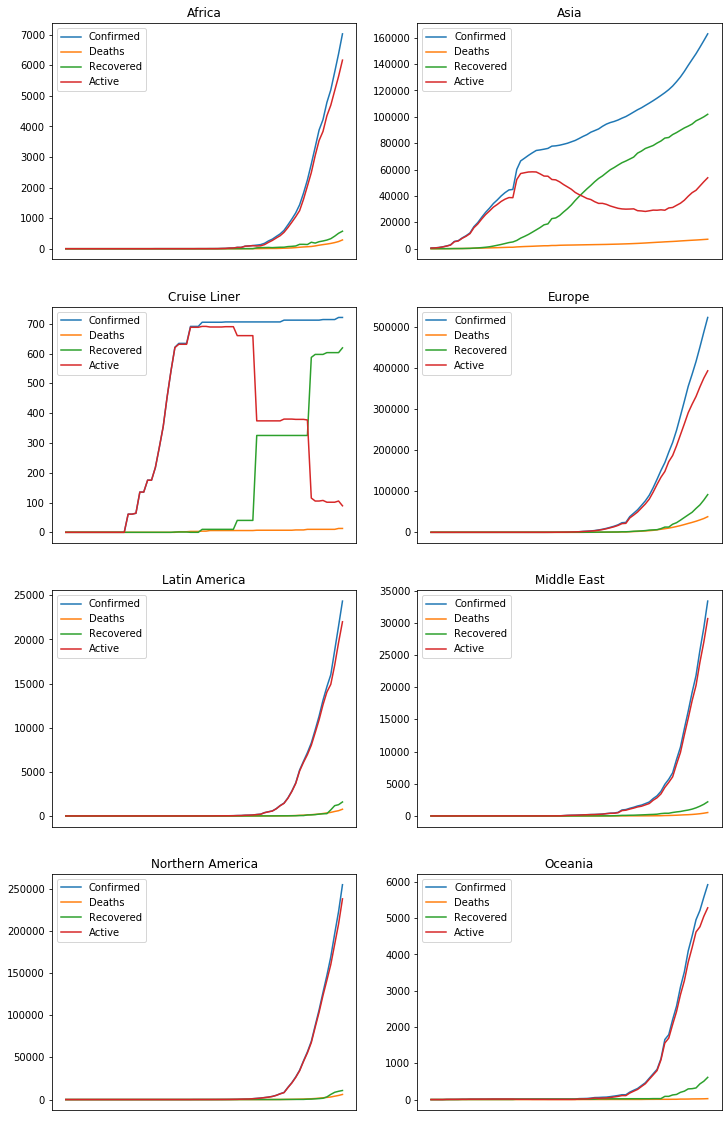

In [107]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12,20))

for region, ax in zip(confirmed_df.groupby('Country/Region').sum().index, axes.flatten()):
    summary = pd.concat([confirmed_df.groupby('Country/Region').sum().loc[region],
                         deaths_df.groupby('Country/Region').sum().loc[region],
                         recovered_df.groupby('Country/Region').sum().loc[region],
                         active_df.groupby('Country/Region').sum().loc[region]],axis=1)
    summary.columns = ['Confirmed','Deaths','Recovered','Active']
    ax.plot(summary)
    ax.set_title(region)
    ax.legend(summary.columns)
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page7.pdf')

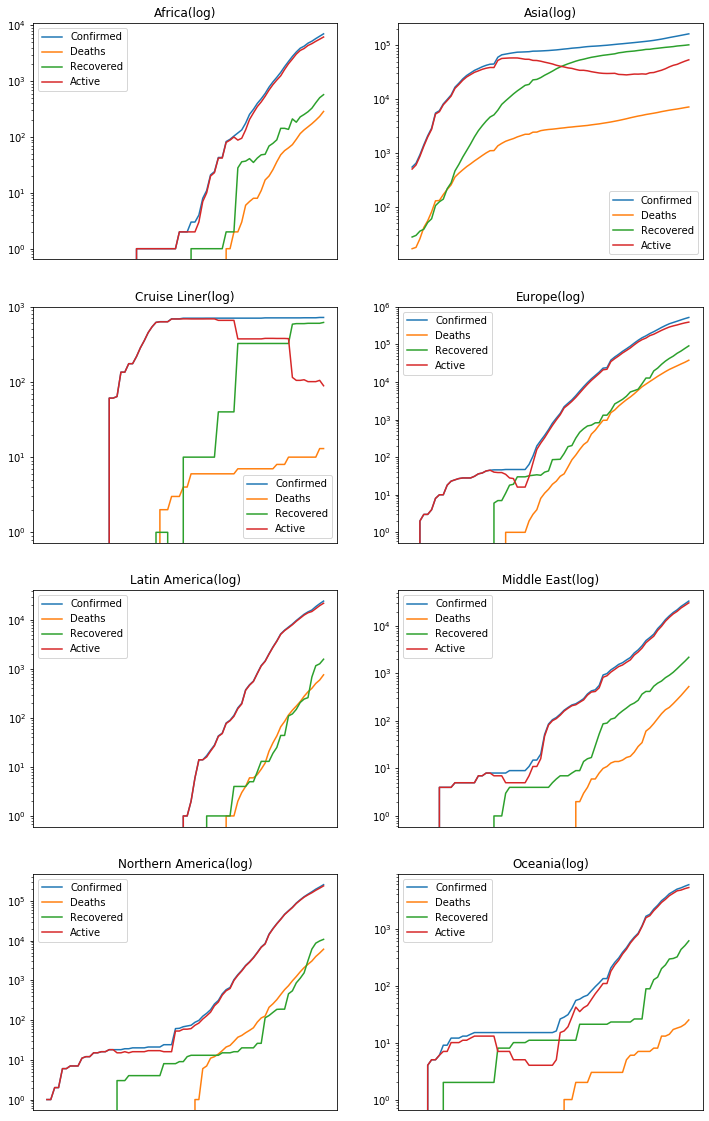

In [108]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12,20))

for region, ax in zip(confirmed_df.groupby('Country/Region').sum().index, axes.flatten()):
    summary = pd.concat([confirmed_df.groupby('Country/Region').sum().loc[region],
                         deaths_df.groupby('Country/Region').sum().loc[region],
                         recovered_df.groupby('Country/Region').sum().loc[region],
                         active_df.groupby('Country/Region').sum().loc[region]],axis=1)
    summary.columns = ['Confirmed','Deaths','Recovered','Active']
    ax.plot(summary)
    ax.set_title(region+'(log)')
    ax.legend(summary.columns)
    ax.set_yscale('log')
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page8.pdf')

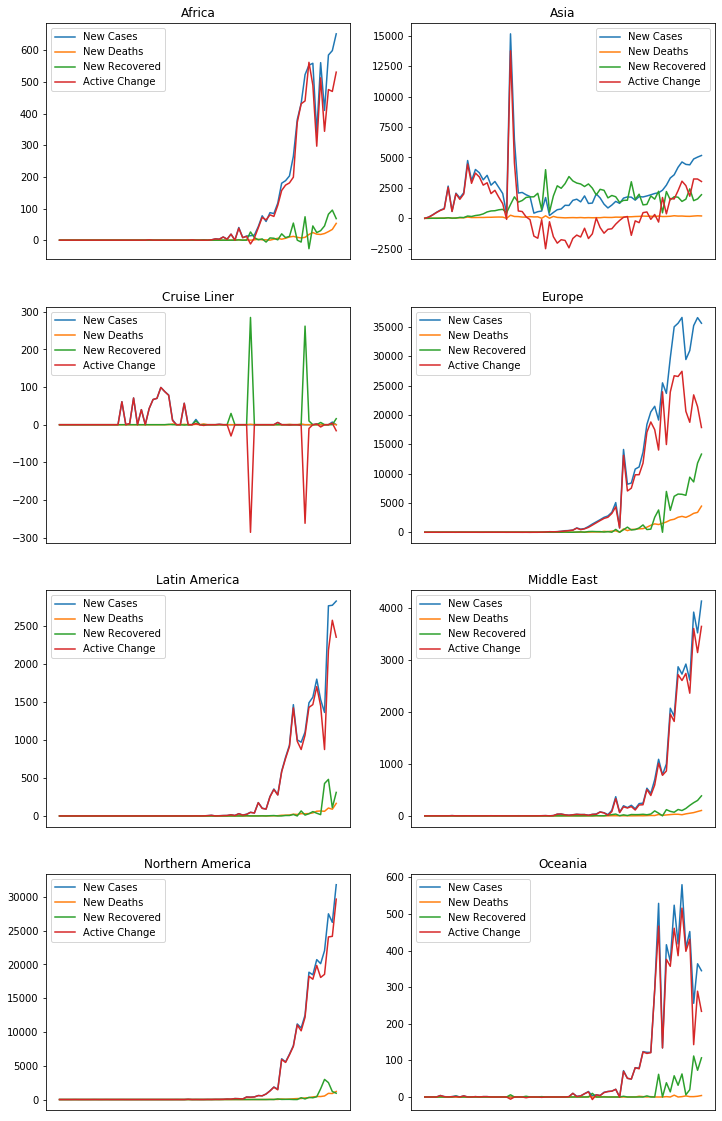

In [109]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12,20))

for region, ax in zip(new_cases.groupby('Country/Region').sum().index, axes.flatten()):
    summary = pd.concat([new_cases.groupby('Country/Region').sum().loc[region],
                         new_deaths.groupby('Country/Region').sum().loc[region],
                         new_recovered.groupby('Country/Region').sum().loc[region],
                         active_change.groupby('Country/Region').sum().loc[region]],axis=1)
    summary.columns = ['New Cases','New Deaths','New Recovered','Active Change']
    ax.plot(summary)
    ax.set_title(region)
    ax.legend(summary.columns)
    
for ax in axes.flatten():
    ax.set_xticks([])

plt.savefig('pdf/page9.pdf')

In [110]:
with pd.ExcelWriter('covid19_region_'+datetime.today().strftime('%Y%m%d')+'.xlsx') as writer:
    summary_df.sort_index(ascending=False).to_excel(writer,sheet_name='World')
    for region in confirmed_df.groupby('Country/Region').sum().index:
        summary = pd.concat([confirmed_df.groupby('Country/Region').sum().loc[region],
                         deaths_df.groupby('Country/Region').sum().loc[region],
                         recovered_df.groupby('Country/Region').sum().loc[region],
                         active_df.groupby('Country/Region').sum().loc[region]],axis=1)
        summary.columns = ['累積感染者数','累積死者数','累積回復者数','現行感染者数']
        summary.sort_index(ascending=False).to_excel(writer,sheet_name=region)

In [111]:
region_summary = pd.concat([confirmed_df.groupby('Country/Region').sum().iloc[:,-1],
                            new_cases.groupby('Country/Region').sum().astype(int).iloc[:,-1],
                            deaths_df.groupby('Country/Region').sum().iloc[:,-1],
                            new_deaths.groupby('Country/Region').sum().astype(int).iloc[:,-1],
                            recovered_df.groupby('Country/Region').sum().iloc[:,-1],
                            new_recovered.groupby('Country/Region').sum().astype(int).iloc[:,-1],
                            active_df.groupby('Country/Region').sum().iloc[:,-1],
                            active_change.groupby('Country/Region').sum().astype(int).iloc[:,-1]],axis=1)

In [112]:
region_summary.columns = ['confirmed','new cases','deaths','new deaths','recovered','new recovered','active','active change']

In [113]:
region_summary.append(region_summary.sum().rename('World')).sort_values('confirmed',ascending=False)

,confirmed,new cases,deaths,new deaths,recovered,new recovered,active,active change
Country/Region,,,,,,,,
World,1013157,80552,52983,6174,210263,17086,749911,57292
Europe,524116,35642,38111,4454,92014,13325,393991,17863
Northern America,254737,31805,6065,1199,10736,938,237936,29668
Asia,162924,5158,7193,196,101933,1939,53798,3023
Middle East,33361,4129,529,103,2192,384,30640,3642
Latin America,24345,2821,760,165,1584,309,22001,2347
Africa,7032,652,287,53,573,68,6172,531
Oceania,5921,345,25,4,612,107,5284,234
Cruise Liner,721,0,13,0,619,16,89,-16


In [114]:
f = open('summary.html','w')
a = region_summary.append(region_summary.sum().rename('World')).sort_values('confirmed',ascending=False).to_html()
f.write(a)
f.close()

In [115]:
pdfkit.from_file('summary.html', 'summary.pdf')

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

In [116]:
region_summary.columns = [
    '累積感染者数','新規感染者数','累積死者数','新規死者数','累積回復者数','新規回復者数','現行感染者数','現行感染者増減数']

In [117]:
region_summary.index = ['アフリカ','アジア','クルーズ船','欧州','南米','中東','北米','オセアニア']

In [118]:
region_summary

,累積感染者数,新規感染者数,累積死者数,新規死者数,累積回復者数,新規回復者数,現行感染者数,現行感染者増減数
アフリカ,7032,652,287,53,573,68,6172,531
アジア,162924,5158,7193,196,101933,1939,53798,3023
クルーズ船,721,0,13,0,619,16,89,-16
欧州,524116,35642,38111,4454,92014,13325,393991,17863
南米,24345,2821,760,165,1584,309,22001,2347
中東,33361,4129,529,103,2192,384,30640,3642
北米,254737,31805,6065,1199,10736,938,237936,29668
オセアニア,5921,345,25,4,612,107,5284,234


In [119]:
region_summary.append(region_summary.sum().rename('世界')).sort_values('累積感染者数',ascending=False)

,累積感染者数,新規感染者数,累積死者数,新規死者数,累積回復者数,新規回復者数,現行感染者数,現行感染者増減数
世界,1013157,80552,52983,6174,210263,17086,749911,57292
欧州,524116,35642,38111,4454,92014,13325,393991,17863
北米,254737,31805,6065,1199,10736,938,237936,29668
アジア,162924,5158,7193,196,101933,1939,53798,3023
中東,33361,4129,529,103,2192,384,30640,3642
南米,24345,2821,760,165,1584,309,22001,2347
アフリカ,7032,652,287,53,573,68,6172,531
オセアニア,5921,345,25,4,612,107,5284,234
クルーズ船,721,0,13,0,619,16,89,-16


In [120]:
with pd.ExcelWriter('covid19_summary_'+datetime.today().strftime('%Y%m%d')+'.xlsx') as writer:
    region_summary.append(region_summary.sum().rename('世界')).sort_values('累積感染者数',ascending=False).to_excel(
    writer,sheet_name='地域別')
    latest.sort_values('累積感染者数',ascending=False).to_excel(writer,sheet_name='各国別')

In [121]:
import PyPDF2

In [122]:
merger = PyPDF2.PdfFileMerger()

merger.append('summary.pdf')
merger.append('latest.pdf')
merger.append('pdf/page0.pdf')
merger.append('pdf/page7.pdf')
merger.append('pdf/page8.pdf')
merger.append('pdf/page9.pdf')
merger.append('pdf/page1.pdf')
merger.append('pdf/page2.pdf')
merger.append('pdf/page3.pdf')
merger.append('pdf/page4.pdf')
merger.append('pdf/page5.pdf')
merger.append('pdf/page6.pdf')

merger.write('covid19_'+datetime.today().strftime('%Y%m%d')+'.pdf')
merger.close()